### [ 참고 ] 

[https://pandas.pydata.org/pandas-docs/stable/groupby.html]

###  UCI 저장소에서 제공하는 피마인디언 데이타

- 1950년대까지 비만인이 없던 피마인디언 부족

- 그러나 페스트푸드 문화와 더불어 지금은 전체 부족의 60%가 당뇨이고 80%가 비만이다


- 샘플수(레코드) : 768
- 속성 : 8
        - 정보1 (pregnant) : 과거 임신 횟수
        - 정보2 (plasma) : 포도당 부하 검사 2시간 후 공복 혈당 농도 (mm Hg)
        - 정보3 (pressure) : 혈압(mm Hg)
        - 정보4 (thickness) :삼두근 피부 주름 두께(mm)
        - 정보5 (insulin) : 혈청 인슐린 (2hour, mu U/ml)
        - 정보6 (BMI) : 체질량지수  weight(kg)/(height(m)*height(m))
        - 정보7 (pedigree) : 당뇨병 가족력
        - 정보8 (age) : 나이
        
- 클래스 : 당뇨 (1:당뇨 / 0:당뇨아님)      


In [1]:
# (1) 데이타셋 로딩
#      pima-indians-diabetes.csv 파일을 데이타프레임으로 로딩하면서 컬럼명도 지정

import pandas as pd

df = pd.read_csv('./data/pima-indians-diabetes.csv', names=['pregnant','plasma','pressure','thickness',
                                                               'insulin','BMI','pedigree','age','diabetes'])


In [4]:
# (2) 정보 확인
df.shape # 행 열 확인

df.info # 자료형 확인



<bound method DataFrame.info of      pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  \
0           6     148        72         35        0  33.6     0.627   50   
1           1      85        66         29        0  26.6     0.351   31   
2           8     183        64          0        0  23.3     0.672   32   
3           1      89        66         23       94  28.1     0.167   21   
4           0     137        40         35      168  43.1     2.288   33   
5           5     116        74          0        0  25.6     0.201   30   
6           3      78        50         32       88  31.0     0.248   26   
7          10     115         0          0        0  35.3     0.134   29   
8           2     197        70         45      543  30.5     0.158   53   
9           8     125        96          0        0   0.0     0.232   54   
10          4     110        92          0        0  37.6     0.191   30   
11         10     168        74          0        0  38.

## [연습]  임신횟수(pregnant)당 당뇨병 발생(diabetes) 확률을 구한다

데이타 가공하는 작업이다


In [7]:
# 임신횟수 와 당뇨병 컬럼만 temp 데이타 프레임 지정
temp = df[['pregnant','diabetes']]
temp

,pregnant,diabetes
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
5,5,0
6,3,1
7,10,0
8,2,1
9,8,1


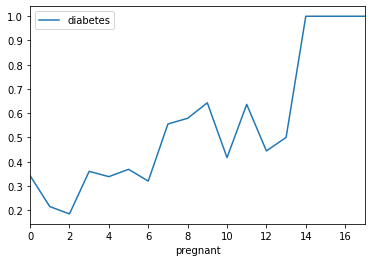

In [13]:
temp1 = temp.groupby(['pregnant']).mean()
temp1

temp2 = temp.groupby(['pregnant'],as_index=False).mean()
temp2

%matplotlib inline
temp1.plot()

[ 분석 ]  임신횟수가 14번 이상이면 당뇨병에 걸릴 확률이 100%인가? 

임신횟수가 14번 이상인 경우가 몇 건 없는데 당뇨병이라고 하여 이를 확정할 수 있나???`0

적어도 집단의 비율이 동일해야 예를 들어

1 ~ 3명 / 4 ~ 6명 / 7 ~ 9명 / 10 ~ 12명 / 13 ~ 이상명을 임신횟수를 가진 사람들을 각 집단에 100명씩 조사한 결과라던가 

[ 추가 고민 ] 임신횟수별 인원수를 구해서 나누면 되지 않을까나